In [11]:
import matplotlib.pyplot as plt  # 导入 matplotlib 库，用于图像显示
from PIL import Image  # 导入 PIL 库，用于图像加载和处理
import torchvision.transforms as transforms  # 导入 torchvision.transforms 模块，用于图像预处理
import torch
import torch.nn as nn

In [20]:
transform = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
image_path = 'Apple.jpg'
image = Image.open(image_path)
image_tensor = transform(image)
print(image_tensor.shape)
print(image_tensor[0,128])

torch.Size([3, 256, 256])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9961, 0.9451, 0.5961,
        0.3922, 0.4078, 0.4784, 0.4980, 0.5098, 0.4784, 0.4235, 0.4706, 0.5412,
        0.5137, 0.4902, 0.4902, 0.4863, 0.4745, 0.4392, 0.4431, 0.4275, 0.4510,
        0.4863, 0.4784, 0.4706, 0.5216, 0.5412, 0.5373, 0.5176, 0.4824, 0.5020,
        0.5098, 0.5098, 0.5216, 0.5294, 0.5373, 0.5333, 0.4941, 0.5020, 0.5059,
        0.5020, 0.5176, 0.4588, 0.4706, 0.5137, 0.5333, 0.5412, 0.5451, 0.5608,
        0.6000, 0.6039, 0.6000, 0.5686, 0.5216, 0.5843, 0.6706, 0.6510, 0.6000,
        0.5373, 0.5490, 0.5569, 0.5804, 0.5961, 0.5765, 0.5529, 0.5490, 0.5451,
        0.5137, 0.4902, 0.4980, 0.4941, 0.4980, 0.5490, 0.5686, 0.5490, 0.5608,
        0.5451, 0.5098, 0.5294, 0.5412, 0.5216, 0.5255, 0.5333, 0.5216, 0.4902,
        0.4824

In [8]:
image_numpy = image_tensor.numpy().transpose((1, 2, 0))
print(image_numpy.shape)

(256, 256, 3)


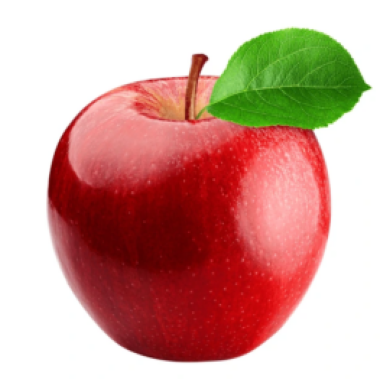

In [10]:
plt.imshow(image_numpy)
plt.axis('off')
plt.show()

In [27]:
# 创建神经网络模型
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(16,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.decoder = nn.Sequential(
            # HO = (Hin - 1) .s -2p +k + op
            nn.ConvTranspose2d(8,16,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.Sigmoid() # 输出转化为0到1范围
        )
    def forward(self, x):
        x = self.encoder(x)
        # print(f"encode shape:{x.shape}")
        x = self.decoder(x)
        # print(f"decode shape:{x.shape}")
        return x
model = AutoEncoder()
x = model(torch.rand((3,256,256)))

In [28]:
# 训练数据
import torch.optim as optim

In [35]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3)
epochs = 400
for epoch in range(epochs):
    output = model(image_tensor)
    loss = loss_fn(output, image_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f"epoch:{epoch+1}/{epochs},loss:{loss.item()}")


epoch:10/400,loss:0.0025203104596585035
epoch:20/400,loss:0.0019724832382053137
epoch:30/400,loss:0.0019030856201425195
epoch:40/400,loss:0.001925180316902697
epoch:50/400,loss:0.0018972543766722083
epoch:60/400,loss:0.001897811540402472
epoch:70/400,loss:0.001892551314085722
epoch:80/400,loss:0.0018899313872680068
epoch:90/400,loss:0.001887854072265327
epoch:100/400,loss:0.0018857327522709966
epoch:110/400,loss:0.0018835103837773204
epoch:120/400,loss:0.0018811841728165746
epoch:130/400,loss:0.0018787910230457783
epoch:140/400,loss:0.00187629833817482
epoch:150/400,loss:0.001873722649179399
epoch:160/400,loss:0.0018710641888901591
epoch:170/400,loss:0.0018683228408917785
epoch:180/400,loss:0.0018655186286196113
epoch:190/400,loss:0.0018626470118761063
epoch:200/400,loss:0.0018597141606733203
epoch:210/400,loss:0.0018567126244306564
epoch:220/400,loss:0.0018536411225795746
epoch:230/400,loss:0.0018505062907934189
epoch:240/400,loss:0.0018473082454875112
epoch:250/400,loss:0.00184405816

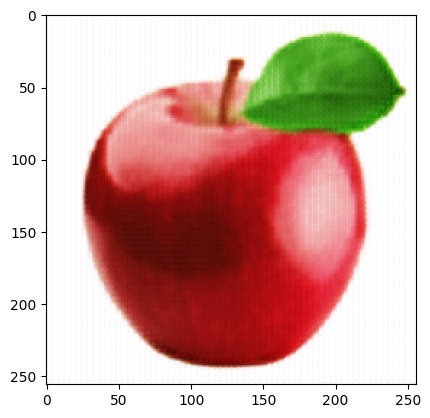

In [36]:
# 重构图像（推理）
with torch.no_grad():
    output = model(image_tensor)
image_numpy = output.numpy().transpose((1, 2, 0))
plt.imshow(image_numpy)
plt.show()
